App Rating Prediction

Project 1 

DESCRIPTION
Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:
Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

Content: Dataset: Google Play Store data (“googleplaystore.csv”)

Fields in the data –
•	App: Application name
•	Category: Category to which the app belongs 
•	Rating: Overall user rating of the app
•	Reviews: Number of user reviews for the app
•	Size: Size of the app
•	Installs: Number of user downloads/installs for the app
•	Type: Paid or Free
•	Price: Price of the app
•	Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
•	Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.
•	Last Updated: Date when the app was last updated on Play Store
•	Current Ver: Current version of the app available on Play Store
•	Android Ver: Minimum required Android version
 

In [1]:
import numpy as np
import pandas as pd


In [2]:
# Q.1. Load the data file using pandas. 

data=pd.read_csv('googleplaystore.csv')

In [3]:
# Q.2. Check for null values in the data. Get the number of null values for each column.
# Q.3. Drop records with nulls in any of the columns.

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Q.4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

         1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
            0.	Extract the numeric value from the column
            1.	Multiply the value by 1,000, if size is mentioned in Mb
           

In [6]:


print(data.Size.value_counts())
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: return None
    
data.Size=data.Size.map(change)
data.Size.value_counts()



Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64


14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
383.0        1
454.0        1
812.0        1
442.0        1
619.0        1
Name: Size, Length: 411, dtype: int64

In [7]:
data.Size.fillna(method='pad',inplace=True)
print(data.Size.isnull().sum())


0


Q.4.2.Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float). 


In [8]:

data['Reviews']=data["Reviews"].astype('int')

In [9]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Q.4.3.	Installs field is currently stored as string and has values like 1,000,000+. 
      1.	Treat 1,000,000+ as 1,000,000
      2.	remove ‘+’, ‘,’ from the field, convert it to integer

In [10]:
data['Installs']=data['Installs'].str.replace('[+,]','')


C:\Users\akhilesh\AppData\Local\Temp/ipykernel_11316/2974977208.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs']=data['Installs'].str.replace('[+,]','')


In [11]:

data['Installs']=data["Installs"].astype('int')


Q.4.4.	Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.



In [12]:

data['Price']=data['Price'].str.replace('$','')


C:\Users\akhilesh\AppData\Local\Temp/ipykernel_11316/2428225794.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','')


In [13]:

data['Price'].value_counts()


0         8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [14]:
data['Price']=data['Price'].astype('float')


In [15]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Q.5. Sanity checks:

    1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.


In [16]:
data['Rating'].unique()

# data- Rating is between 1 to 5

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Q 5. 
2.	Reviews should not be more than installs as only those who installed can review the app. 
If there are any such records, drop them.


In [17]:
np.sum(data['Reviews']>data['Installs'])

# Reviews can be equal to Installs but can'nt be greater than that

7

In [18]:
data.drop(data[data['Reviews']>data['Installs']].index,inplace=True)


Q5
 3. For free apps (type = “Free”), the price should not be > 0. Drop any such rows.


In [19]:
data.dtypes


App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
np.sum(data['Price']>0)

642

In [21]:
np.sum(data['Price']==0)

8711

In [22]:
np.sum(data['Type']=='Free')

8711

In [23]:
np.sum(data['Type']=='Paid')

642

Q.6. Performing univariate analysis: 
  
  1. Boxplot for Price. Are there any outliers? Think about the price of usual apps on Play Store.
    


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

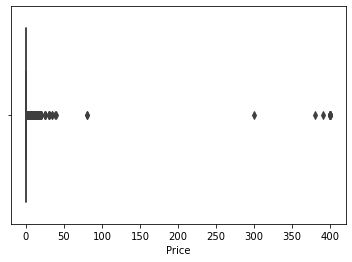

In [24]:
import seaborn as sns
sns.boxplot(data['Price'])

# usual price range is 0-50

In [25]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

Q.6.2 
Boxplot for Reviews. Are there any apps with very high number of reviews? Do the values seem right?


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

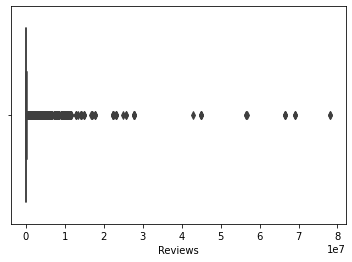

In [26]:
sns.boxplot(data['Reviews'])

# yes the reviews are really high

Q5.3 Histogram for Rating. How are the ratings distributed? Is it more toward higher ratings?


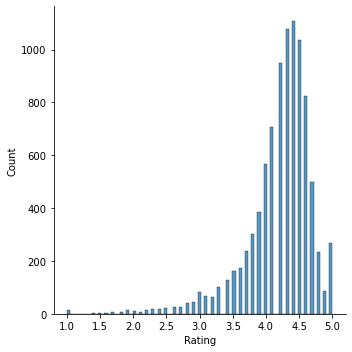

In [27]:
sns.displot(data["Rating"])

# yes, it is more towards higher rating

Q5.4	Histogram for Size. Note down your observations for the plots made above. Which of these seem to have outliers?

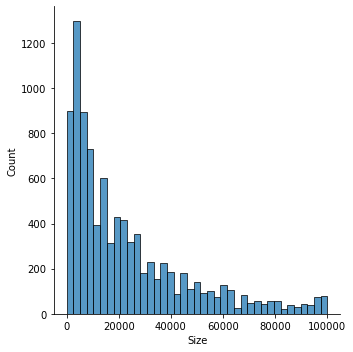

In [28]:
sns.displot(data["Size"])


7. Outlier treatment: 

    1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    0.	Check out the records with very high price
    0.	Is 200 indeed a high price?
    1.	Drop these as most seem to be junk apps


Q.7.1.	

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
            0.	Check out the records with very high price
            0.	Is 200 indeed a high price?
            1.	Drop these as most seem to be junk apps

In [29]:
dt1=data[data.Price<200].copy()



In [58]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

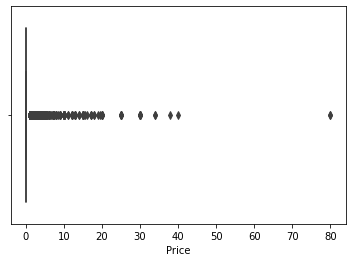

In [30]:
sns.boxplot(dt1.Price)


Q.7.2. Reviews: Very few apps have very high number of reviews. 
       These are all star apps that don’t help with the analysis and, in fact, will skew it.
       Drop records having more than 2 million reviews.

In [31]:
dt2=dt1[dt1.Reviews<2000000].copy()


Q.7.3.	Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
    0.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
    1.	Decide a threshold as cutoff for outlier and drop records having values more than that

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

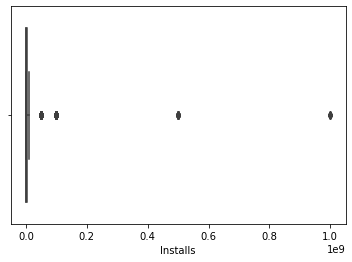

In [32]:
sns.boxplot(dt2['Installs'])

In [33]:
dt2.Installs.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])


0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [34]:
dt3=dt2[dt2.Installs<10000000].copy()


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

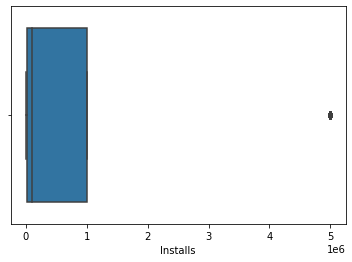

In [35]:
sns.boxplot(dt3['Installs'])

8. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1.	Make scatter plot/joinplot for Rating vs. Price
        0.	What pattern do you observe? Does rating increase with price?
    
    2.	Make scatter plot/joinplot for Rating vs. Size
        0.	Are heavier apps rated better?

    3.	Make scatter plot/joinplot for Rating vs. Reviews
        0.	Does more review mean a better rating always?

    4.	Make boxplot for Rating vs. Content Rating
        0.	Is there any difference in the ratings? Are some types liked better?

    5.	Make boxplot for Ratings vs. Category
        0.	Which genre has the best ratings?

For each of the plots above, note down your observation.

In [36]:
import matplotlib.pyplot as plt

Q.8.1.	Make scatter plot/joinplot for Rating vs. Price
        0.	What pattern do you observe? Does rating increase with price?

Text(0.5, 1.0, ' Rating vs. Price plot ')

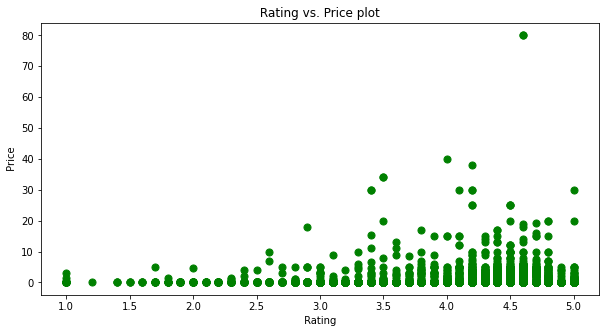

In [37]:
plt.figure(figsize=(10,5))

plt.scatter(dt3['Rating'], dt3['Price'], color='g', s=50 )

plt.xlabel ( " Rating " )
plt.ylabel ( " Price " )
plt.title ( " Rating vs. Price plot " )

# yes, the rating is incresing with price

Q.8.2.	Make scatter plot/joinplot for Rating vs. Size
        0.	Are heavier apps rated better?

Text(0.5, 1.0, ' Rating vs. Size plot ')

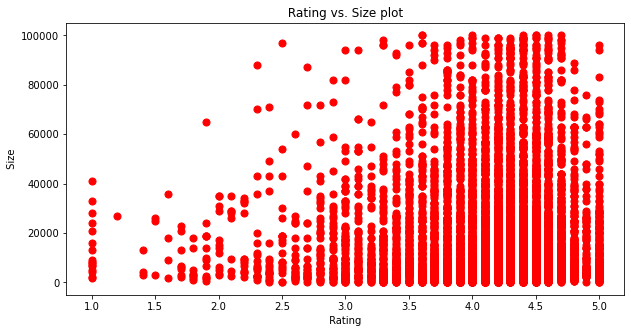

In [38]:
plt.figure(figsize=(10,5))

plt.scatter(dt3['Rating'], dt3['Size'], color='r', s=50 )


plt.xlabel ( " Rating " )
plt.ylabel ( " Size " )
plt.title ( " Rating vs. Size plot " )

# heavier apps are rated better but its not the rule

Q.8.3.	Make scatter plot/joinplot for Rating vs. Reviews
        0.	Does more review mean a better rating always?

Text(0.5, 1.0, ' Rating vs. Reviews plot ')

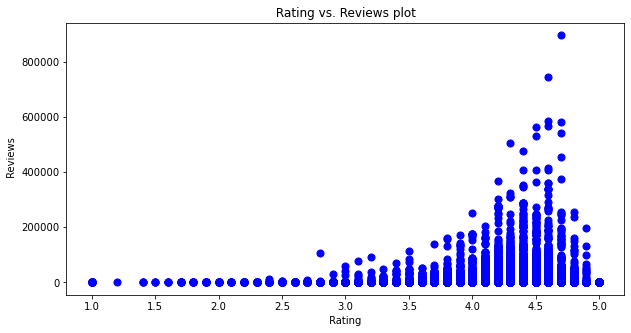

In [39]:
plt.figure(figsize=(10,5))

plt.scatter(dt3['Rating'], dt3['Reviews'], color='b', s=50 )

plt.xlabel ( " Rating " )
plt.ylabel ( " Reviews" )
plt.title ( " Rating vs. Reviews plot " )

# yes, reviews and rating have a strong positive correlation

Q.8.4.	Make boxplot for Rating vs. Content Rating
        0.	Is there any difference in the ratings? Are some types liked better?

   

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

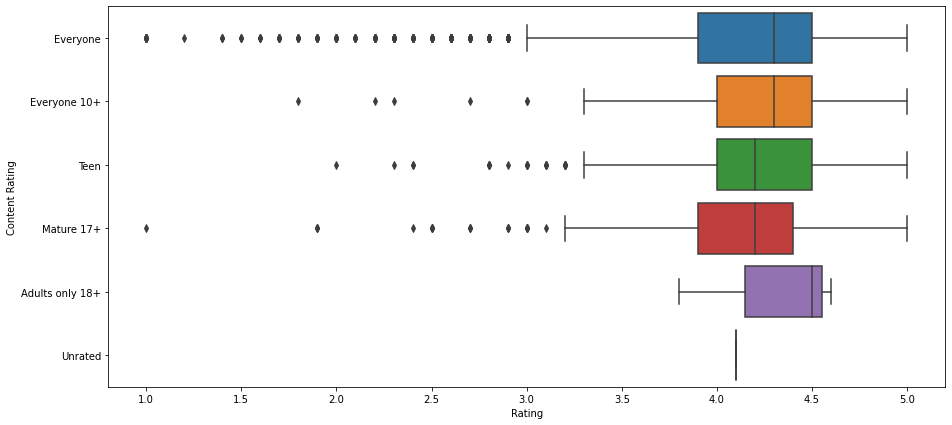

In [40]:
plt.figure(figsize=[15,7])
sns.boxplot("Rating","Content Rating",data=dt3)

#Mostly adults(18+) have always rated it high

5.	Make boxplot for Ratings vs. Category
        0.	Which genre has the best ratings?

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Category'>

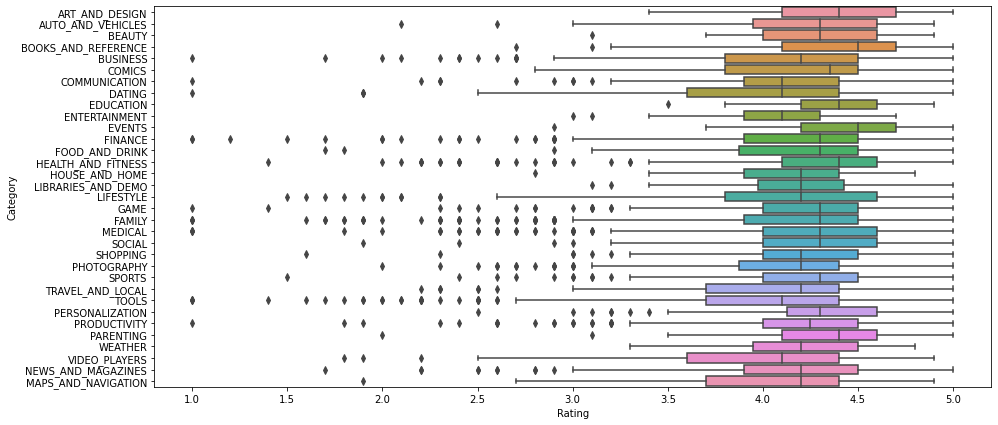

In [41]:
plt.figure(figsize=[15,7])
sns.boxplot("Rating","Category",data=dt3)

# ART and Design genre has best rating

9. Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
    
    1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
    
    2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

    3.Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.



In [42]:
inp1=dt3.copy()

In [43]:
inp1['Reviews']=np.log1p(inp1['Reviews'])

In [44]:
inp1['Installs']=np.log1p(inp1['Installs'])

In [45]:
col_drop=['App','Last Updated','Current Ver', 'Android Ver']
inp2=inp1.drop(col_drop, axis=1).copy()


In [46]:
list1=['Category','Type','Genres','Content Rating'] 
inp2=pd.get_dummies(inp2,columns=list1)


10. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.


In [47]:

from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.30,random_state=32)


In [48]:
print(df_train.shape)
print(df_test.shape)

(5080, 156)
(2178, 156)


11. Separate the dataframes into X_train, y_train, X_test, and y_test.


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 10257 to 4455
Columns: 156 entries, Rating to Content Rating_Unrated
dtypes: float64(5), uint8(151)
memory usage: 987.2 KB


In [50]:
y_train=df_train.pop('Installs')

X_train=df_train

In [51]:
y_test=df_test.pop('Installs')

X_test=df_test

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5080, 155)
(2178, 155)
(5080,)
(2178,)


12 . Model building • Use linear regression as the technique • Report the R2 on the train set


In [53]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred=regressor.predict(X_test)
y_pred

array([10.60013094, 16.15975191, 13.11246457, ..., 10.80876444,
        9.73196929,  9.96739275])

13. Make predictions on test set and report R2


In [55]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

# 90% accuracy reported

0.9084390525833401
